# Multi-class Dog Breed Classification

This notebook builds an multi class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given a image of a dog.

When ever i see an dog and want to know about its breed and I can took a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we are using is from Kaggle's dog breed
https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

In the evaluation there is a file with prediction probabilities for each dog of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Detail features of data:
* We are working on unstructured data of images, to solve it we can use deep learning/transfer learning.
* There are approximately 10,000+ images in the training set.(with labels)
* There are approximately 10,000+ images in the test set(without labels)
* There are 120 different classes of dogs breeds


---



In [0]:
#Unzipping the zip file to access the data

#!unzip "drive/My Drive/Dog_Breed_Analysis/dog-breed-identification.zip" -d "drive/My Drive/Dog_Breed_Analysis"

# Getting the workspace ready

* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we are using a GPU

In [27]:
# Import TensorFLow into Colab
import tensorflow as tf
print("TF version", tf.__version__)

TF version 1.15.0


In [1]:
#Import TF 2.x version
try:
  # %tensorflow_version only exists in colab
  %tensorflow_version 2.x
except Exception: 
  pass

TensorFlow 2.x selected.


In [2]:
#Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

#Check for GPU availability
print("GPU", "available: Yes it's available" if tf.config.experimental.list_physical_devices('GPU') else "Not available :(")

TF version: 2.2.0-rc1
TF Hub version: 0.7.0
GPU available: Yes it's available


## Getting data ready(turning into tensors)

With all the machine learning models, our data has to be in numerical format. Turning our images into Tensors(numerical representations)

Let's start by accessing our data and checking out labels of our data of dog images

In [4]:
#Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/Dog_Breed_Analysis/labels.csv")
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     3c2b54572a0d76921cc45568129274ec  scottish_deerhound
freq                                   1                 126


In [5]:
# Checking top 5 labels of dataset
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


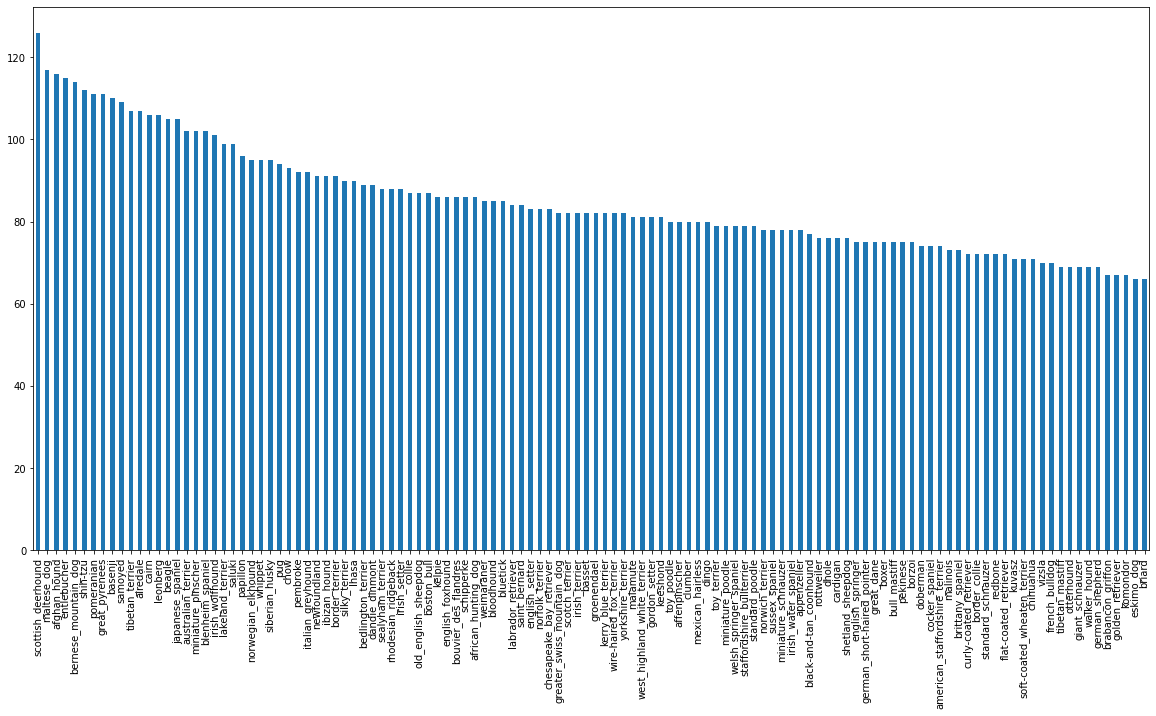

In [6]:
#Checking number of images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [7]:
#Find median number images per breed

labels_csv["breed"].value_counts().median()

82.0

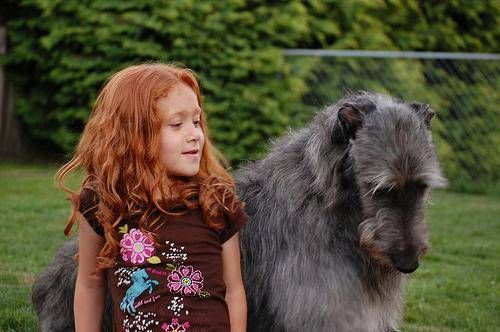

In [8]:
#Picking a image and view
from IPython.display import Image
Image("drive/My Drive/Dog_Breed_Analysis/train/0042188c895a2f14ef64a918ed9c7b64.jpg")

## Getting Images and labels
let's get a list of all of our Image file pathname

In [9]:
#Create pathnames from image ID's
filenames = ["drive/My Drive/Dog_Breed_Analysis/train/" + fname + ".jpg" for fname in labels_csv["id"]]

#Check the first 5 file names
filenames[:5]

['drive/My Drive/Dog_Breed_Analysis/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [10]:
import os
os.listdir("drive/My Drive/Dog_Breed_Analysis/train/")[:5]

['f588238227e5822b0c83a8355eccd067.jpg',
 'eda840df78ede0c000cd97b337b3d0db.jpg',
 'ef80922725c7fb9865005222ef30714e.jpg',
 'e9d31fe3a42451dc01c6d2e15ba6ef8d.jpg',
 'f0efab499435ecd4e634b72f539fde9b.jpg']

In [11]:
#Checking whether number of file names matches number of actual images files
import os
if len(os.listdir("drive/My Drive/Dog_Breed_Analysis/train/")) == len(filenames):
  print("We can proceed as filenames match actual amount of file")
else:
  print("Stop, Filenames don't match amount of file")

We can proceed as filenames match actual amount of file


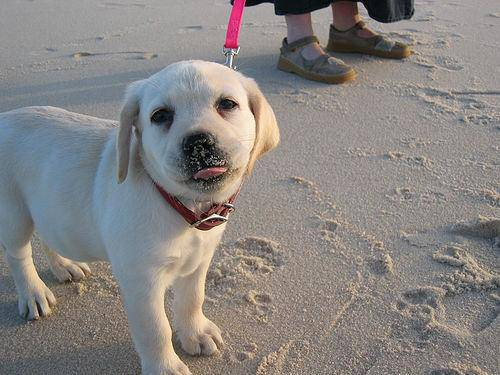

In [14]:
#Let's check by taking random values
Image(filenames[4564])

In [15]:
#Checking the name of breed of this dog
labels_csv["breed"][4564]

'labrador_retriever'

#### After converting our training file images filepaths in a list, we have to prepare labels for breed!

In [16]:
# Let's prepare labels
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [17]:
# Length of all the labels
len(labels)

10222

In [18]:
# Check if number of labels matches the number of filenames
if len(labels)== len(filenames):
  print("All Good, Number of labels matches number of filenames!")
else:
  print("Something wrong number of labels does not match number of filenames, check data directory!")

All Good, Number of labels matches number of filenames!


In [19]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [20]:
# Turning a single label into an array of booleans
print(labels[4564])
labels[4564]==unique_breeds

labrador_retriever


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
#Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [0]:
len(boolean_labels)

10222

In [0]:
#Example for turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0]))  # index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [0]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [0]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [24]:
filenames[:5]

['drive/My Drive/Dog_Breed_Analysis/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

##Creating validation set
We have train set, test set as we dnt have validation set we should build validation set

In [0]:
#Creating X & y variables
X = filenames
y = boolean_labels


In [26]:
len(filenames)

10222

We have huge number of images its better to take 1000 and further increase as per the requirnments


In [0]:
#Setup for number of images to use for experimenting
NUM_IMAGES = 1000 #@param{type: "slider", min:1000, max:10000, step:1000}

In [30]:
#Lets split our data into train & validation sets
from sklearn.model_selection import train_test_split


#Split them into training & validation of tptal size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state = 42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [31]:
#Lets have a look at the training data
X_train[:5], y_train[:2]

(['drive/My Drive/Dog_Breed_Analysis/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog_Breed_Analysis/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog_Breed_Analysis/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog_Breed_Analysis/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog_Breed_Analysis/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fals

Preprocessing Images ( Transforming Images into numerical form(Tensors)

* To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our `image` (convert color channel values from 0-255 to 0-1)
5. Resize the image to be a shape of (224, 224)
6. Return the modified image

In [0]:
#Convery  image to Numpy array
from matplotlib.pyplot import imread
image = imread(filenames[100])
image.shape

(500, 500, 3)

In [0]:
image.max(), image.min()

(255, 0)

In [0]:
image[:2]

array([[[ 1,  0,  0],
        [26, 25, 23],
        [ 1,  0,  0],
        ...,
        [ 0,  0,  0],
        [10, 10,  8],
        [ 7,  7,  5]],

       [[ 1,  0,  0],
        [11, 10,  8],
        [15, 14, 12],
        ...,
        [15, 15, 13],
        [ 0,  0,  0],
        [ 9,  9,  7]]], dtype=uint8)

In [0]:
#Turn image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[ 1,  0,  0],
        [26, 25, 23],
        [ 1,  0,  0],
        ...,
        [ 0,  0,  0],
        [10, 10,  8],
        [ 7,  7,  5]],

       [[ 1,  0,  0],
        [11, 10,  8],
        [15, 14, 12],
        ...,
        [15, 15, 13],
        [ 0,  0,  0],
        [ 9,  9,  7]]], dtype=uint8)>

#After we have seen what an image looks like as a Tensor, lets make a function to preprocess them

1. Take an image filepath as input
2. Use TensorFlow to read the file and it to a variable, image
3. Turn our image (a jpg) into Tensors
4. Normalize our `image` (convert color channel values from 0-255 to 0-1)
5. Resize the image to be a shape of (224, 224)
6. Return the modified image

In [0]:
#Define image size
IMG_SIZE = 224

#Create a funtion for preprocessing images
def process_image(image_path, img_size =IMG_SIZE):
  """
  Take an image file path and turn the image into a tensor.
  """
  #Read in an image file
  image = tf.io.read_file(image_path)
  #Turn the jpeg image into numerical Tensor with 3 colour channels(Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels = 3)
  #Normalization: Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  #Resize the image to our desired value(224,224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image



## Turning our data into batches

Importance of data into batches?

* For instance if we want to process thousands of images at a time suppose 5000,10000, 20000.... memory of your system might be a good fit to process.

* To over come this problem we make a batch of images at a time here we are taking 32, we can always change this number if needed.

* For the effective use of Tensorflow, we need our data in the form of tensor tuples which look as below:
`(image, label)`

In [0]:
#Creating a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Take an image file path name and the associated label,
  processes the image and returns a tuple of the (image, label)
  """
  image = process_image(image_path)
  return image,label


In [0]:
(process_image(X[42]), y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

## NOw we have to turn our data into tuples of Tensors in the form: `(image, label)`, lets make a function to turn all of out data(X & y) into desired numbered batches!

In [0]:
#Define the batch size to 32
BATCH_SIZE = 32

#Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Create batches of data out of image(X) and label (y) pairs.
  Shuffles the data if it is training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # IF the data is a test dataset, we probably don't have labels
  if test_data:
     print("Creating test data batches...")
     data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) #Only filepaths (no labels)
     data_batch = data.map(process_image).batch(BATCH_SIZE)
     return data_batch

  #If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
      print("Creating validation data batches...")
      data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                                tf.constant(y)))  #labels
      data_batch = data.map(get_image_label).batch(BATCH_SIZE)
      return data_batch

  else:
        print("Creating training data batches..")
        #Turn filepath and laebsl into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))
        
        #Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size = len(X))

        #Create (image, label) tuples (this also turns the image path into a processed image)
        data = data.map(get_image_label)

        #Turn the training data into batches
        data_batch = data.batch(BATCH_SIZE)
  return data_batch



In [0]:
#Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_val, y_val, valid_data = True)


Creating training data batches..
Creating validation data batches...


In [0]:
#Check out the different attributes of our data batches
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, however these can be a little hard to understand, let's visualize the batches

In [0]:
import matplotlib.pyplot as plt

#Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their lables from a data batch
  """
  #Setup the figure
  plt.figure(figsize = (10,10))
  #Loop through 25 (for displaying 25 images)
  for i in range(25):
    #Create subplots ( 5 rows, 5 columns)
    ax = plt.subplot(5,5, i+1)
    #Display an image
    plt.imshow(image[i])
    #Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #Turn the grid lines off
    plt.axis("off")

In [0]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

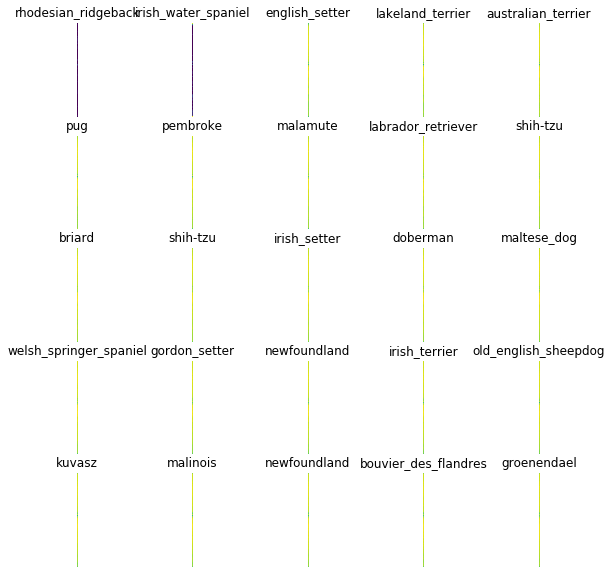

In [0]:
# NOw lets visualize the data into training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

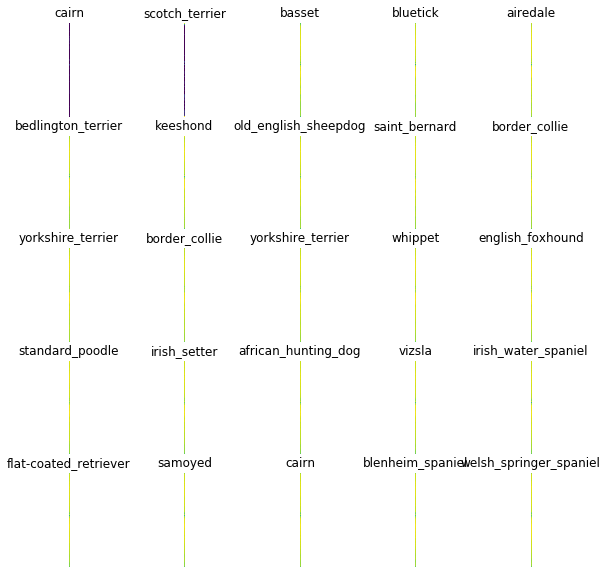

In [0]:
#Now lets visualize our validation set
valid_images, valid_labels = next(valid_data.as_numpy_iterator())
show_25_images(valid_images, valid_labels)

In [0]:
#unique_breeds[y[0].argmax()]

In [0]:
unique_breeds


array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

#Building a model

Befor we build a model, there are few things we need to define:
* The input shape(our images shape, in the form of tensors) to our model.
* The output shape(image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from the tensorflow hub:
https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4



In [0]:
#Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]   #batch, height, width, colour channels

#Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

#Setup model URL from TensorFlow  Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


As we are ready with our inputs, putputs and model.
Let's put them together into keras deep learning model!

Creating function based on information available:
* Takes the input shape, output shape and the model we have chosen as parameter.
* Define the layers in a keras model in sequential fashion(do this first, then this , then that).
* Complies the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting)
* Returns the model.

All the above mentioned steps can be found here:

https://www.tensorflow.org/guide/keras/overview


In [0]:
# Creating a function which builds a keras model
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building model with:", MODEL_URL)
  
  #Setup the model layers
  model = tf.keras.Sequential([
     hub.KerasLayer(MODEL_URL), #Layer 1 (input layer)
     tf.keras.layers.Dense(units = OUTPUT_SHAPE,
                          activation = "softmax") # Layers 2 (output layer)
  ])

#Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  #Build the model
  model.build(INPUT_SHAPE)

  return model

In [0]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# Creating callbacks

Call back are helper function a model can use during training to do such things as save its progess, check its progess or stop training early if a model atops improving.

We'll create two callbacks, one for tensorboard which helps track our moels progess and another forearly stopping which prevents our model from training for too long.

#TensorBoard callback 

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training)


In [0]:
#Load TensorBoard notebook extention
%load_ext tensorboard

In [0]:
import datetime
#create a function to build aTensoboard callback
def create_tensorboard_callback():
  #Create a log directory for storing Tensorboard logs
  logdir = os.path.join("drive/My Drive/Dog_Breed_Analysis/logs",
                        #Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%HM%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


Early Stopping callback

Early stopping helps our model from overfitting by stopping training if a certain evaluation metric stops improving.
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping#methods_2

In [0]:
#Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                 patience = 3)

# Training a model( on subset of data)

Our first model is only going to train on 1000 images, to maek sure everything is working

In [0]:
NUM_EPOCHS = 100 #@param {type: "slider", min:10, max:100, step:10 }

In [0]:
#Check to make sure we are still running on GPU
print("GPU", "available (YESSS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESSS!!!!)


Let's create a function which trains a model.

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for(`NUM_EPOCHS`) and the callbacks we had like to use
* Return the model

In [0]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """

  #create a model
  model = create_model()

  #create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  #Fit the model to the data passing it the callbacks we created 
  model.fit(x = train_data,
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])
  #Return the fitted model
  return model



In [0]:
#Fit the model to the data
model = train_model()


Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Train for 25 steps, validate for 7 steps
Epoch 1/100
25/25 [==============================] - 415s 17s/step - loss: 4.6408 - accuracy: 0.0838 - val_loss: 3.5580 - val_accuracy: 0.2500
Epoch 2/100
25/25 [==============================] - 5s 204ms/step - loss: 1.6448 - accuracy: 0.6950 - val_loss: 2.2153 - val_accuracy: 0.5500
Epoch 3/100
25/25 [==============================] - 5s 212ms/step - loss: 0.5575 - accuracy: 0.9400 - val_loss: 1.7037 - val_accuracy: 0.6150
Epoch 4/100
25/25 [==============================] - 5s 212ms/step - loss: 0.2454 - accuracy: 0.9900 - val_loss: 1.5308 - val_accuracy: 0.6450
Epoch 5/100
25/25 [==============================] - 5s 208ms/step - loss: 0.1437 - accuracy: 0.9975 - val_loss: 1.4444 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 5s 210ms/step - loss: 0.0990 - accuracy: 0.9987 - val_loss: 1.3942 - val_accuracy: 0.6500
Epoch 7/

#### It looks like our model is overfitting because it's performing far better on the training dataset than the validation datasset what are some ways to prevent model overfitting in deep learning neural networks?

Note: Overfitting to begin with is a good thing, it means our model is learning !!!


### Checking the TensorBoard logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earliier and visualize its contents

In [0]:
%tensorboard --logdir drive/My\ Drive/Dog_Breed_Analysis/logs 

## Evaluating and making predictions using trained model

In [0]:
# Make prediction on the validation data (not used to train on)

predictions = model.predict(valid_data, verbose = 1)
predictions


7/7 [==============================] - 1s 213ms/step


array([[1.61949720e-03, 7.70403421e-05, 2.26317265e-04, ...,
        1.62906165e-03, 1.47929295e-05, 3.04153515e-03],
       [2.25995760e-03, 1.61671516e-04, 1.06535954e-02, ...,
        4.02401405e-04, 4.25567292e-03, 5.30517253e-04],
       [8.69147334e-05, 2.13528001e-05, 2.50231133e-05, ...,
        3.85605119e-04, 6.33817224e-04, 1.59994804e-03],
       ...,
       [7.59725008e-05, 3.28084658e-04, 8.22148751e-04, ...,
        7.06171704e-05, 1.80062954e-04, 1.16195646e-03],
       [3.15671763e-03, 3.62887688e-04, 1.03523584e-04, ...,
        8.37966334e-04, 1.73666907e-04, 2.35223025e-02],
       [7.32217333e-04, 2.87782277e-05, 9.30483919e-04, ...,
        7.76141591e-04, 1.23975042e-03, 2.27499870e-04]], dtype=float32)

In [0]:
predictions.shape

(200, 120)

In [0]:
len(y_val)

200

In [0]:
np.sum(predictions[0])

1.0

In [0]:
# First Prediction
index  = 100
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[4.31338640e-06 2.46278955e-06 1.97969639e-04 4.64607865e-07
 2.93858058e-04 3.16378864e-05 1.08382492e-05 1.07528385e-05
 1.71859073e-03 3.93381226e-04 1.63456218e-06 2.50917237e-05
 1.27172074e-03 1.41082955e-05 2.14132383e-01 8.93008619e-05
 3.73509033e-06 4.76661138e-03 1.08274571e-06 1.29239361e-05
 2.05694214e-05 3.34374810e-04 4.30564978e-05 5.05262506e-05
 2.20217207e-03 4.62266209e-04 6.17651167e-05 1.40780812e-05
 4.36111391e-01 2.41534872e-04 2.78787367e-04 2.53821490e-03
 1.53375106e-04 8.51871482e-06 7.12546534e-05 1.58162802e-05
 1.49469022e-04 3.28379654e-04 1.14934323e-06 1.39064708e-04
 2.02882686e-03 3.30543503e-06 6.32984375e-05 3.61206796e-04
 2.35776114e-03 5.80564711e-06 2.36270280e-04 6.79563731e-04
 2.15498090e-04 4.90214452e-02 2.97747738e-05 2.24845498e-05
 1.47105427e-03 3.66548488e-06 5.76098137e-05 6.13673546e-06
 6.24631299e-04 6.54952310e-04 9.34026437e-04 2.91110453e-04
 3.62239283e-04 3.11818330e-05 2.43567411e-06 1.39458707e-05
 6.57076271e-07 3.661234

Having the above functionality is great but we wantr to be able to doit at scale

It would be even better if we could see the image the prediction is being made on!

**Note:** Prediction probability are also known as confidence levels

In [0]:
#Turn prediction probabilities into their repective label (easier to understand)
def get_pred_labels(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_labels(predictions[22])
pred_label

'cairn'

As we know our validation data is in a batch dataset, we will have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels(truth labels)

In [0]:
valid_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
#create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Take a batched dataset of (image, label) Tensors amd returns separate arrays of images andlabels
  """
  images = []
  labels = []

  #Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

#Unbatchify the validation data
valid_images, valid_label = unbatchify(valid_data)
valid_images[0], valid_labels[0]



(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [0]:
get_pred_labels(valid_labels[2])

'basset'

Now we have to do list below:

* Prediction labels
* Validation labels(truth labels)
* Validation images

Lets's make some funtion to make these all a bit more visualize.

We will create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of imaegs and integers.
* Convert the prediction probabilities to a predicted labels.
* Plot the predicted label, its predicted probability, the truth label and the taget image on a single plot

In [0]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """

  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  #Get the pred label
  pred_label = get_pred_labels(pred_prob)

  #Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    colour = "green"
  else:
    colour = "red"

  #Change plot title to be predicted, probabilitt of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color = colour)




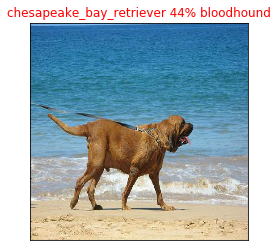

In [0]:
plot_pred(prediction_probabilities= predictions,
          labels = valid_label,
          images = valid_images,
          n = 100);

As we have got 1 function to visualize our models top predictions, let's make another to view our models top 10 prediction

This function will:
* Take an `input` of prediction probabilities array and a ground truth arrat and an innteger
* find the prediction using `get_pred_label()`
* find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green

In [0]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """

  pred_prob, true_label = prediction_probabilities[n], labels[n]

  #Get the predicted label
  pred_label = get_pred_labels(pred_prob)

  #Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  #Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  #find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  #Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color = "grey")
  
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation = "vertical")
  
  #Change the color or true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass


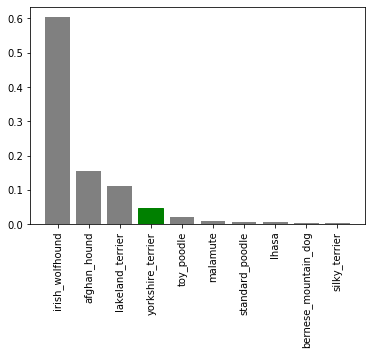

In [0]:
plot_pred_conf(prediction_probabilities= predictions,
               labels = valid_label,
               n=10)

Now we have got some function to help us visualize our predictions and evaluate our model, lets check out

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


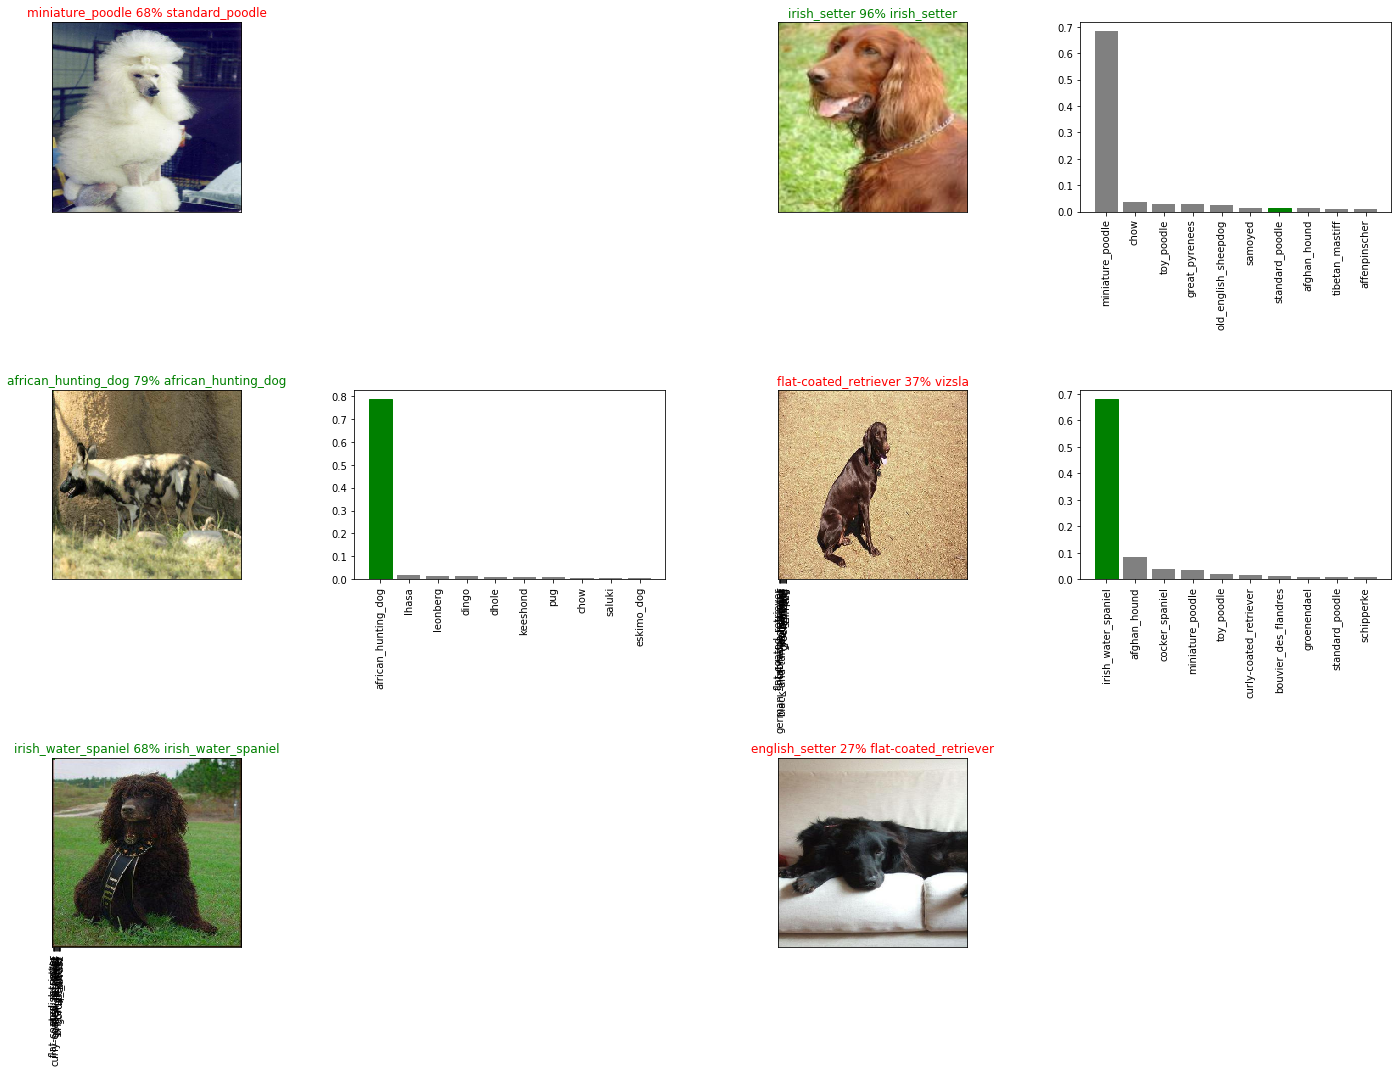

In [0]:
# Let's check out a few predictions and their different values
i_multiplier = 15
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols,2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels = valid_label,
            images= valid_images,
            n=i+i_multiplier)
  plt.subplot(num_rows,2*num_cols, 2+i+2)
  plot_pred_conf(prediction_probabilities = predictions,
                 labels =valid_label,
                 n=i+i_multiplier)
plt.tight_layout(h_pad = 1.0)
plt.show();

Challenge : How would you create a confusion matrix with our model predictions and true labels

# Saving and reloading a trained model

In [0]:
#Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  #Create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/Dog_Breed_Analysis/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" #Save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [0]:
#Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from:{model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects = {"KerasLayer":hub.KerasLayer})
  return model

As we haev got functions to save and load a trained model, lets make sure they work!


In [0]:
#Save our model trained on 1000 images
save_model(model, suffix = "1000-images-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog_Breed_Analysis/models/20200304-03441583293455-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog_Breed_Analysis/models/20200304-03441583293455-1000-images-mobilenetv2-Adam.h5'

In [0]:
#Load a trained model
loaded_1000_image_model = load_model("drive/My Drive/Dog_Breed_Analysis/models/20200303-21331583271210-1000-images-mobilenetv2-Adam.h5")

Loading saved model from:drive/My Drive/Dog_Breed_Analysis/models/20200303-21331583271210-1000-images-mobilenetv2-Adam.h5


In [0]:
#Evaluate the pre-saved model
model.evaluate(valid_data)

7/7 [==============================] - 1s 148ms/step - loss: 1.3409 - accuracy: 0.6400


[1.340900182723999, 0.64]

In [0]:
#Evaluate the loaded model
loaded_1000_image_model.evaluate(valid_data)

7/7 [==============================] - 1s 213ms/step - loss: 1.1441 - accuracy: 0.7050


[1.1440788081714086, 0.705]

# Training a bid dog model (on full data)

In [0]:
len(X), len(y)

(10222, 10222)

In [0]:
X[:10]

['drive/My Drive/Dog_Breed_Analysis/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [0]:
X_train[:10]

['drive/My Drive/Dog_Breed_Analysis/train/00bee065dcec471f26394855c5c2f3de.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/0ea5759640f2e1c2d1a06adaf8a54ca7.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/03e1d2ee5fd90aef036c90a9e7f81177.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/16941a6728ddb9cb7423a6cc97fbe071.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/0bedbecd92390ef9f4f7c8b06a629340.jpg',
 'drive/My Drive/Dog_Breed_Analysis/train/143b9484273e57668d03bfc26755810a.jpg']

In [0]:
len(X_train)

800

In [0]:
y[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [0]:
#Create a data batch with the full dataset
full_data = create_data_batches(X,y)

Creating training data batches..


In [0]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
#Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
#Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
#No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy",
                                                             patience =3)

** NOTE** RUunning the cell below will take a little while(may be upto 30 minutes for the first epoch) because the GPU we are using runtime has to load all the memory.

In [0]:
# Fit to he full model to the full data
#full_model.fit(x= full_data,
      #        epochs = NUM_EPOCHS,
   #           callbacks = [full_model_tensorboard,full_model_early_stopping])

In [0]:
save_model(full_model, suffix = "full-image-set_mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog_Breed_Analysis/models/20200304-03441583293471-full-image-set_mobilenetv2-Adam.h5...


'drive/My Drive/Dog_Breed_Analysis/models/20200304-03441583293471-full-image-set_mobilenetv2-Adam.h5'

In [0]:
#Load in the full model
loaded_full_model = load_model("drive/My Drive/Dog_Breed_Analysis/models/20200303-23331583278382-full-image-set_mobilenetv2-Adam.h5")

Loading saved model from:drive/My Drive/Dog_Breed_Analysis/models/20200303-23331583278382-full-image-set_mobilenetv2-Adam.h5


# Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily, we created `create_dta_batches()` earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we will:
* Get the test images filenames
* Convert the filenames into test data bathes using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels)
* Make a predictions array by passing the test batches to the `predict()` method called on our model.

In [0]:
#Load test image filenames
test_path = "drive/My Drive/Dog_Breed_Analysis/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Dog_Breed_Analysis/test/f446eac396b0e74af84fab5069d28c68.jpg',
 'drive/My Drive/Dog_Breed_Analysis/test/f2996e2ca11b93049069a4a7cafa0ce5.jpg',
 'drive/My Drive/Dog_Breed_Analysis/test/eb61a828e939eb633c1811f283d15647.jpg',
 'drive/My Drive/Dog_Breed_Analysis/test/eda4465ceee576ac15e9bba9566c9121.jpg',
 'drive/My Drive/Dog_Breed_Analysis/test/eb44625ed1113825fe1f23e50222cca1.jpg',
 'drive/My Drive/Dog_Breed_Analysis/test/e9bdf2bcc823964c7375397a7c06242e.jpg',
 'drive/My Drive/Dog_Breed_Analysis/test/f1230a99088c9bc88bc2989affee43d2.jpg',
 'drive/My Drive/Dog_Breed_Analysis/test/f0341ba6b21465ece32d7df0ebff3048.jpg',
 'drive/My Drive/Dog_Breed_Analysis/test/ee0bd39d8d6a0f57d626dbe1e4c52ebb.jpg',
 'drive/My Drive/Dog_Breed_Analysis/test/efcb9740d2350a5aba4344ae5994eb37.jpg']

In [0]:
len(test_filenames)

10357

In [0]:
#create test data batch
test_data = create_data_batches(test_filenames, test_data = True)

Creating test data batches...


In [0]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

**Note** : Calling `predict()` on our full model and passing it the test data batch will take a long time to run(about an `1hour)


In [0]:
#Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose =1)

187/324 [================>.............] - ETA: 40:35

In [0]:
save_model(test_predictions, suffix = "full-image-set_mobilenetv2-Adam")

In [0]:
#Save Predictions (Numpy array) to csv file (for access later)
np.savetxt("drive/My Drive/Dog_breed_Analysis/preds_array.csv", test_predictions, delimiter = ",")

In [0]:
#Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt("drive/My Drive/Dog_breed_Analysis/preds_array.csv", delimiter = ",")

In [0]:
test_predictions[:10]

In [0]:
test_predictions.shape

#Preparing test dataset predictions for kaggle
looking at the kaggle sample submission, we find that it wants our model prediction probability outputs in a DataFrame with an ID and a column for each different dog brees. https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

To get the data in this format, we will do foloowiing steps:
* Create a pandas DataFrame with an ID column as well as a column for each dog breed.
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilities) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to kaggle.

In [0]:
# Create a pandas DataFrame with empty columns
preds_df = pd.dataFrame(column = ["id"] + list(unique_breeds))
preds_df.head()


In [0]:
#Append test image ID's to predictions DataFrame
test_ids = [os.path.splittest(path)[0] for path in os.listdir(test_path))
preds_df["id"] = test_ids

In [0]:
preds_df.head()

In [0]:
#Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

In [0]:
# Save our predictions dataframe to csv for submission to kaggle
pred_df.to_csv("drive/My Drive/Dog_breed_Analysis/full_model_predictions_submission_1_mobilenetV2.csv",
               index = False)

## Making predictions on custom images

To make predictions on custom images, we will:
* Get the filepaths of our own images
* Turn the filepaths into data batches using `create_data_batches()`. Since our custom images won't have labels, we set the `test_data` parameter to `True`
* Pass the custom image data batch to our model's `predict()` method.
* Convert the prediction output probabilities to predictions labels
* Comapre the predicted labels to the custom images


In [0]:
# Get custom images filepaths
custom_path = "drive/My Drive/Dog_breed_Analysis/my-dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [0]:
custom_image_paths

NameError: ignored

In [0]:
#Turn custom images into data batches
custom_data = create_data_batches(custom_image_paths, test_data = True)
custom_data

In [0]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

NameError: ignored

In [0]:
custom_preds.shape

In [0]:
# Get custom image prediction labels
custom_pred_labels = [get_preds_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

In [0]:
# Get custom images (our unbatchify() function won't work since there aren't labels..)
custom_images = []
#Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

In [0]:
# Check custom image predictions
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
  plt.subplot(1,3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)